# RED WINE QUALITY PROJECT

Name: Vaibhav Vilas Tayade
Date: 23-05-2021
contact: 8087970061
email id: vaibhav_t29@rediffmail.com

# IMPORTING RELEVANT LIBRARIES

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# IMPORTING FILE

In [46]:
#importing csv file:

ds = pd.read_csv('Red Wine Quality.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [48]:
ds_new = ds

AS PER THE PROBLEM STATEMENT CONVERTING WINE 'QUALITY' COLUMN TO GOOD AND NOT GOOD CATEGORIES, SO THAT IT BECOMES A CLASSIFICATION PROBLEM.

In [49]:
ds_new['quality'] = ds_new['quality'].replace([7, 8], 'good')
ds_new['quality'] = ds_new['quality'].replace([3, 4, 5, 6], 'not good')

In [50]:
ds_new['quality']

0       not good
1       not good
2       not good
3       not good
4       not good
          ...   
1594    not good
1595    not good
1596    not good
1597    not good
1598    not good
Name: quality, Length: 1599, dtype: object

In [51]:
# checking distribution of categories in the 'quality' column.

ds_new['quality'].value_counts()

not good    1382
good         217
Name: quality, dtype: int64

In [52]:
# checking details of the dataset:

ds_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


OBSERVATION:
    
we can see that Mean is higher than the Median in 'fixed acidity' and 'total sulfur dioxide' columns, which indicates presence of outliers

In [53]:
# checking for null values:

ds_new.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

OBSERVATION:
    
    There are no null values in the dataset.

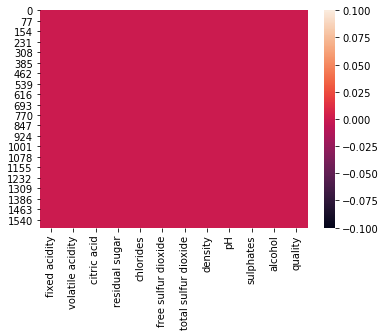

In [54]:
sns.heatmap(ds_new.isnull())

Observation:
    
    Comfirming presence of No NULL values in dataset by plotting heatmap

In [55]:
# checking all columns titles:

ds_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# UNIVARIATE ANALYSIS

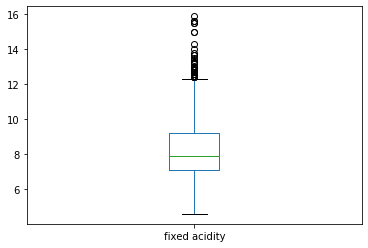

In [56]:
ds_new['fixed acidity'].plot.box()

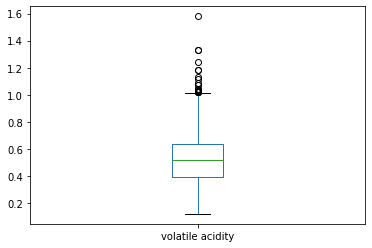

In [57]:
ds_new['volatile acidity'].plot.box()

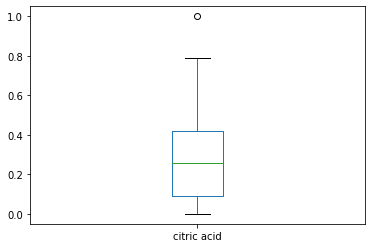

In [58]:
ds_new['citric acid'].plot.box()

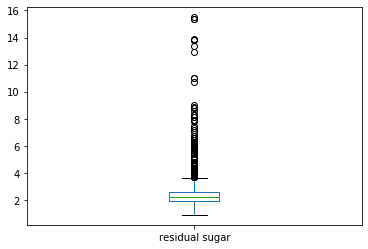

In [59]:
ds_new['residual sugar'].plot.box()

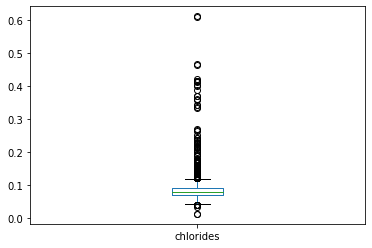

In [60]:
ds_new['chlorides'].plot.box()

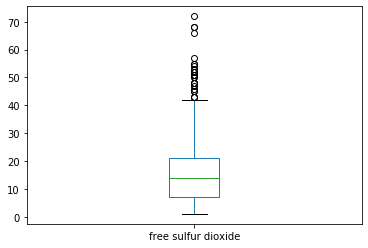

In [61]:
ds_new['free sulfur dioxide'].plot.box()

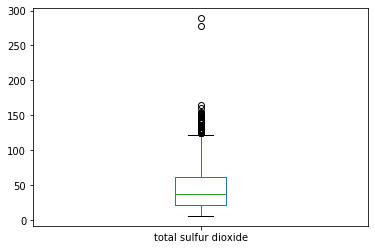

In [62]:
ds_new['total sulfur dioxide'].plot.box()

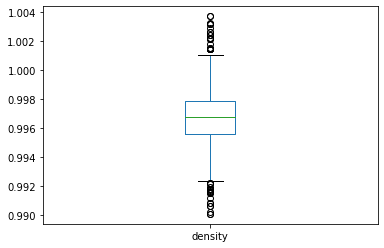

In [63]:
ds_new['density'].plot.box()

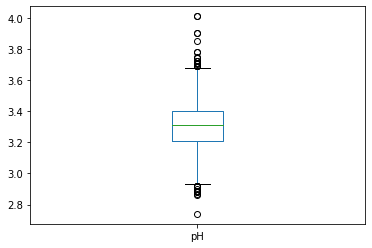

In [64]:
ds_new['pH'].plot.box()

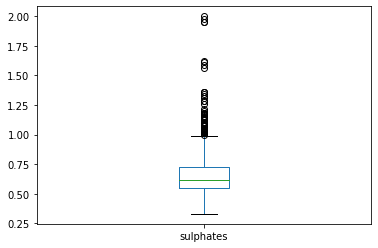

In [65]:
ds_new['sulphates'].plot.box()

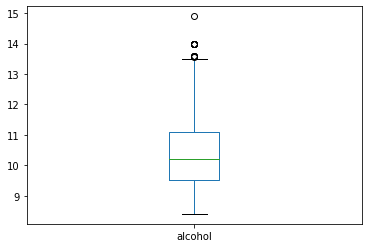

In [66]:
ds_new['alcohol'].plot.box()

OBSERVATIONS:
    
    There are outliers present in almost all columns, though there are very less outliers 'citrix acid' column.
    

# BIVARIATE ANALYSIS

In [67]:
ds_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

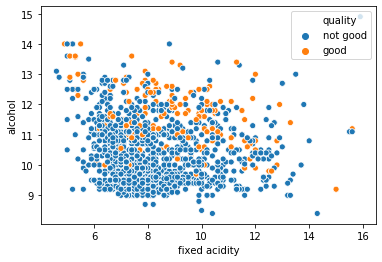

In [68]:
sns.scatterplot(ds_new['fixed acidity'], ds_new['alcohol'], hue=ds_new['quality'])

Observation:
    
With increase in fixed acidity and alcohol content, Quality of the alcohol increases.

In [70]:
# Plotting corelation chart of dataset.

dscor = ds_new.corr()
dscor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


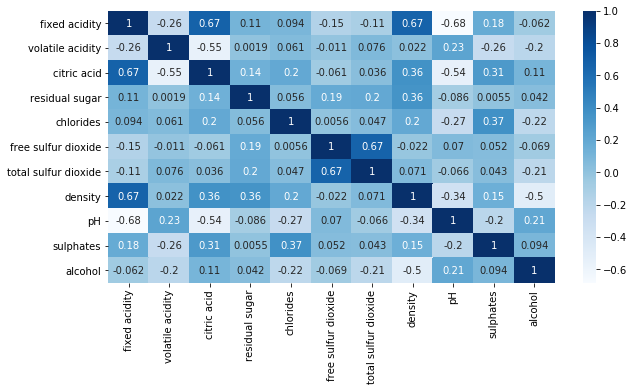

In [71]:

plt.figure(figsize=(10,5))
sns.heatmap(dscor,cmap='Blues', annot=True)

OBSERVATION:
    Density column is highly corelated with alcohol with -0.5 values
    pH column is positively corelated with alcohol with 0.21 values
    

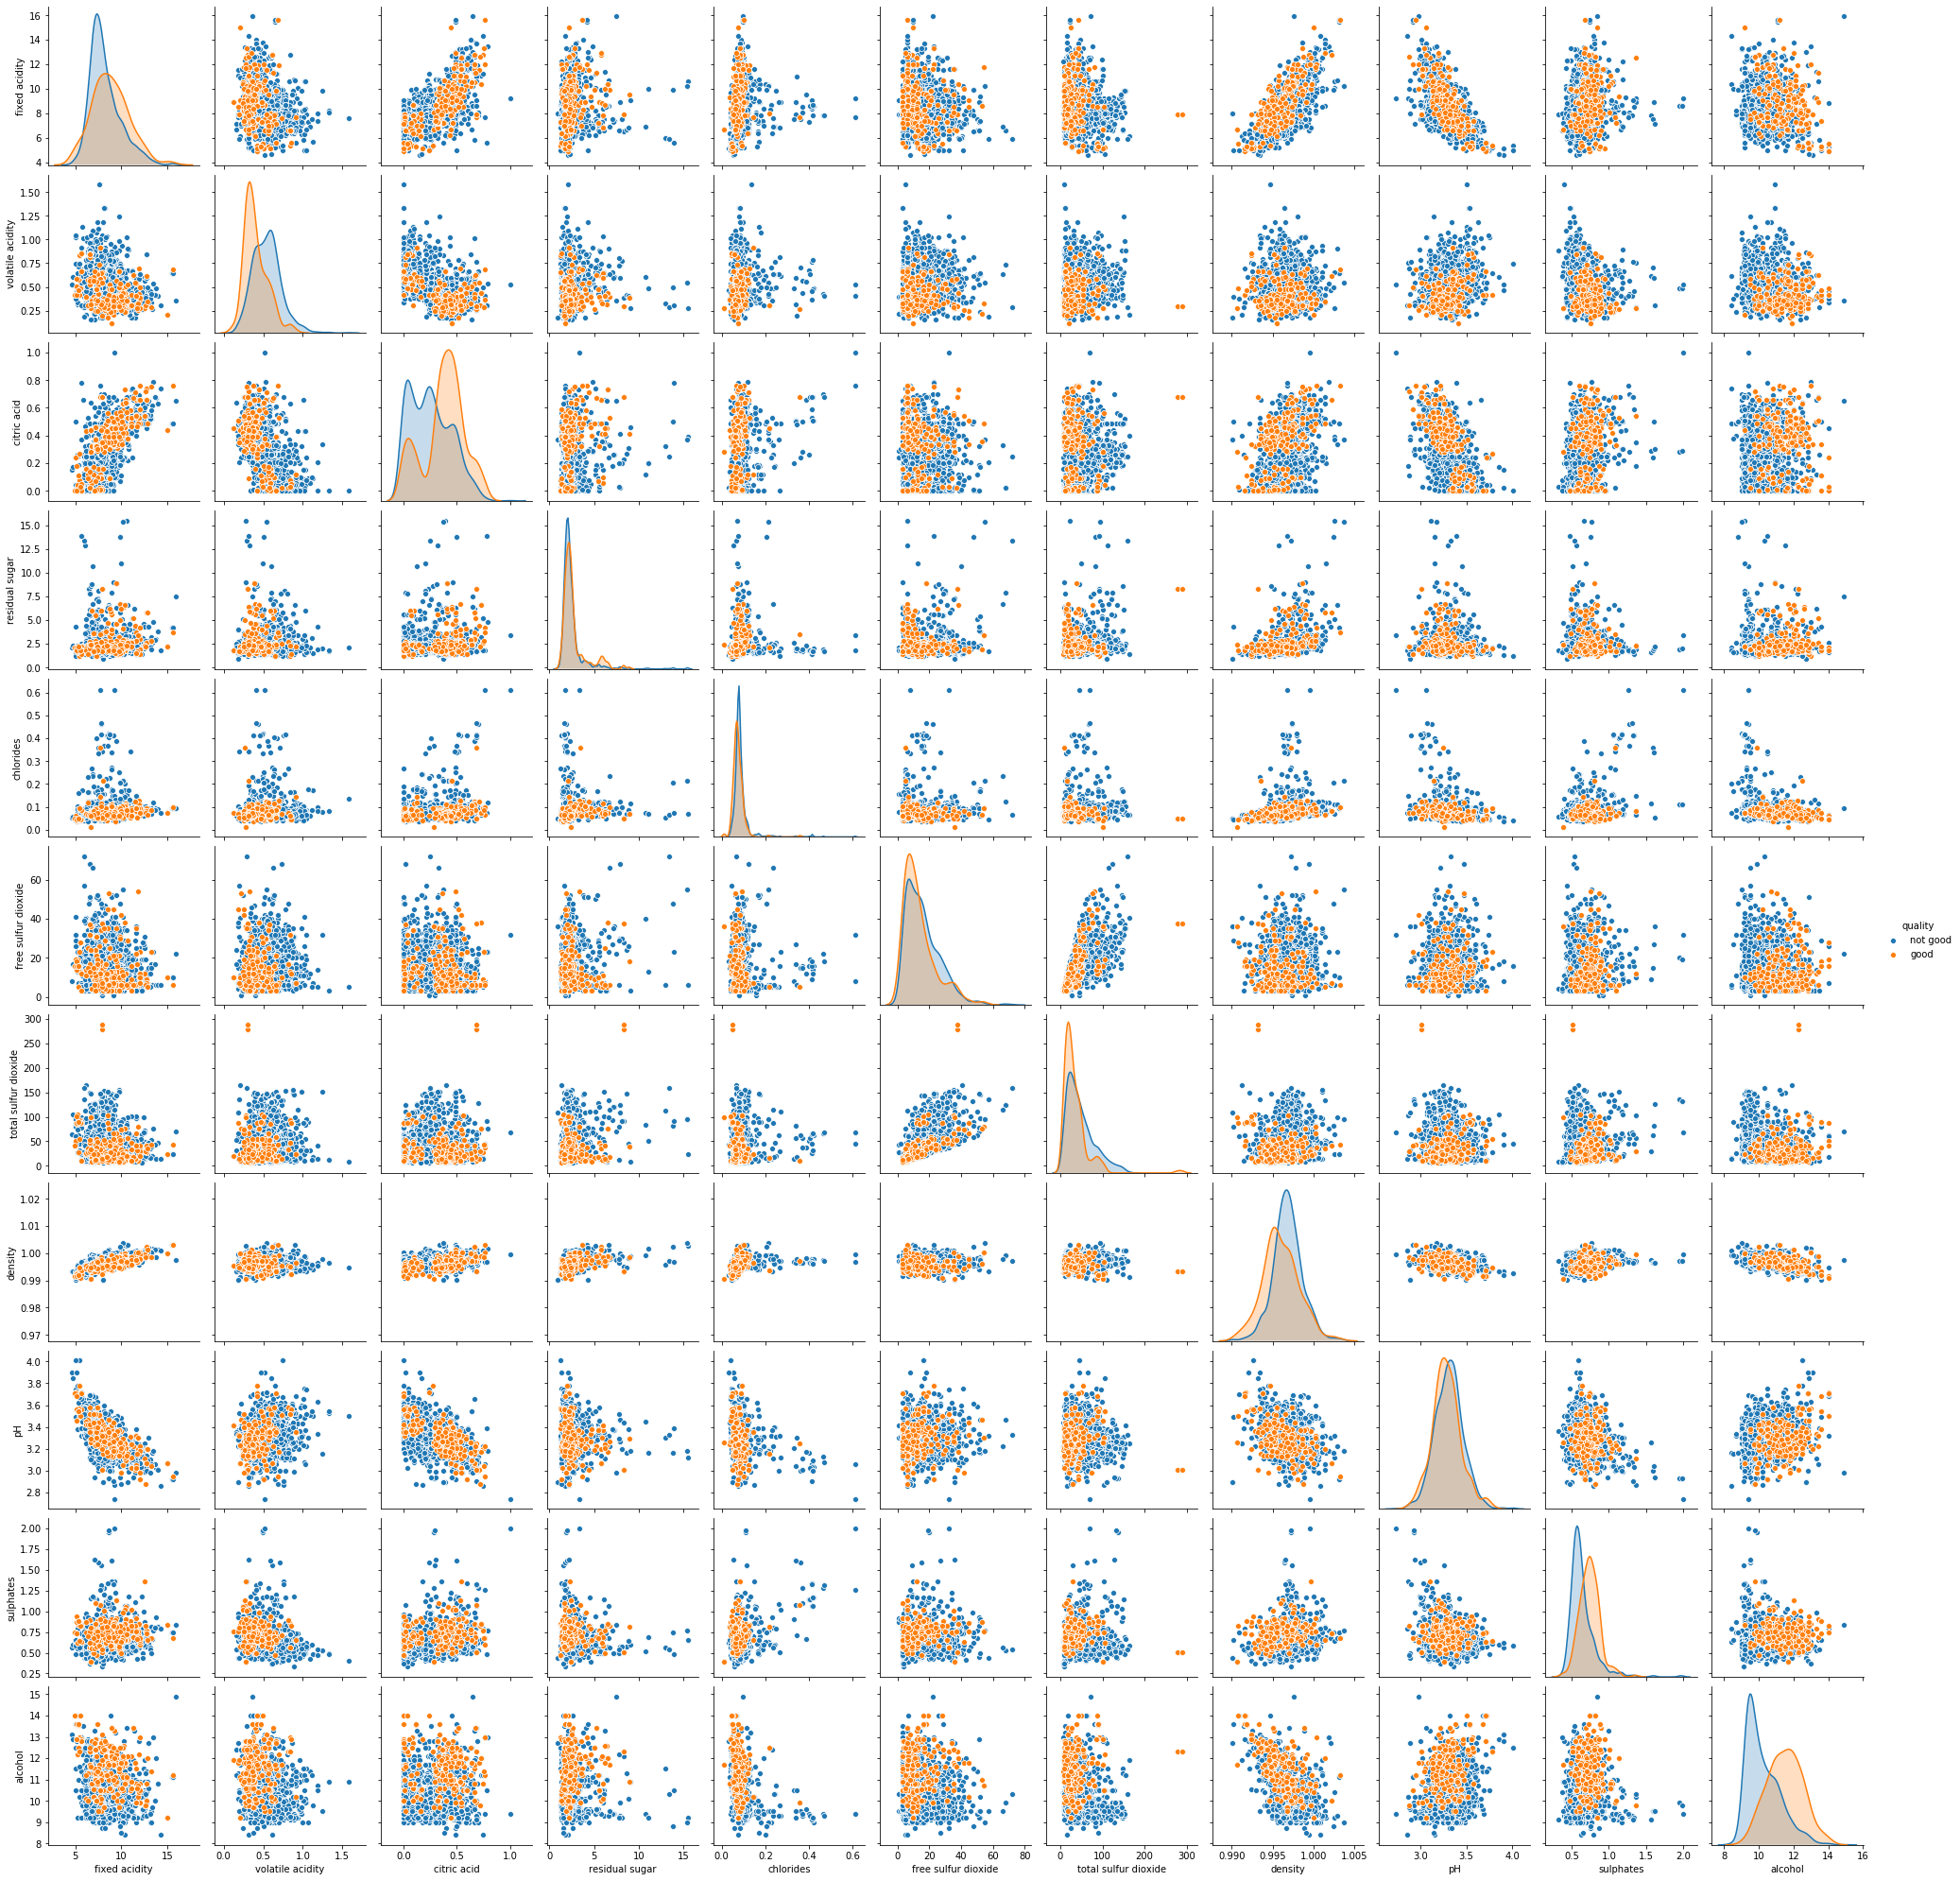

In [73]:
sns.pairplot(ds_new, hue = 'quality')

Observation:
    
    pairplot perfectly depicts the relation between every column with each other.

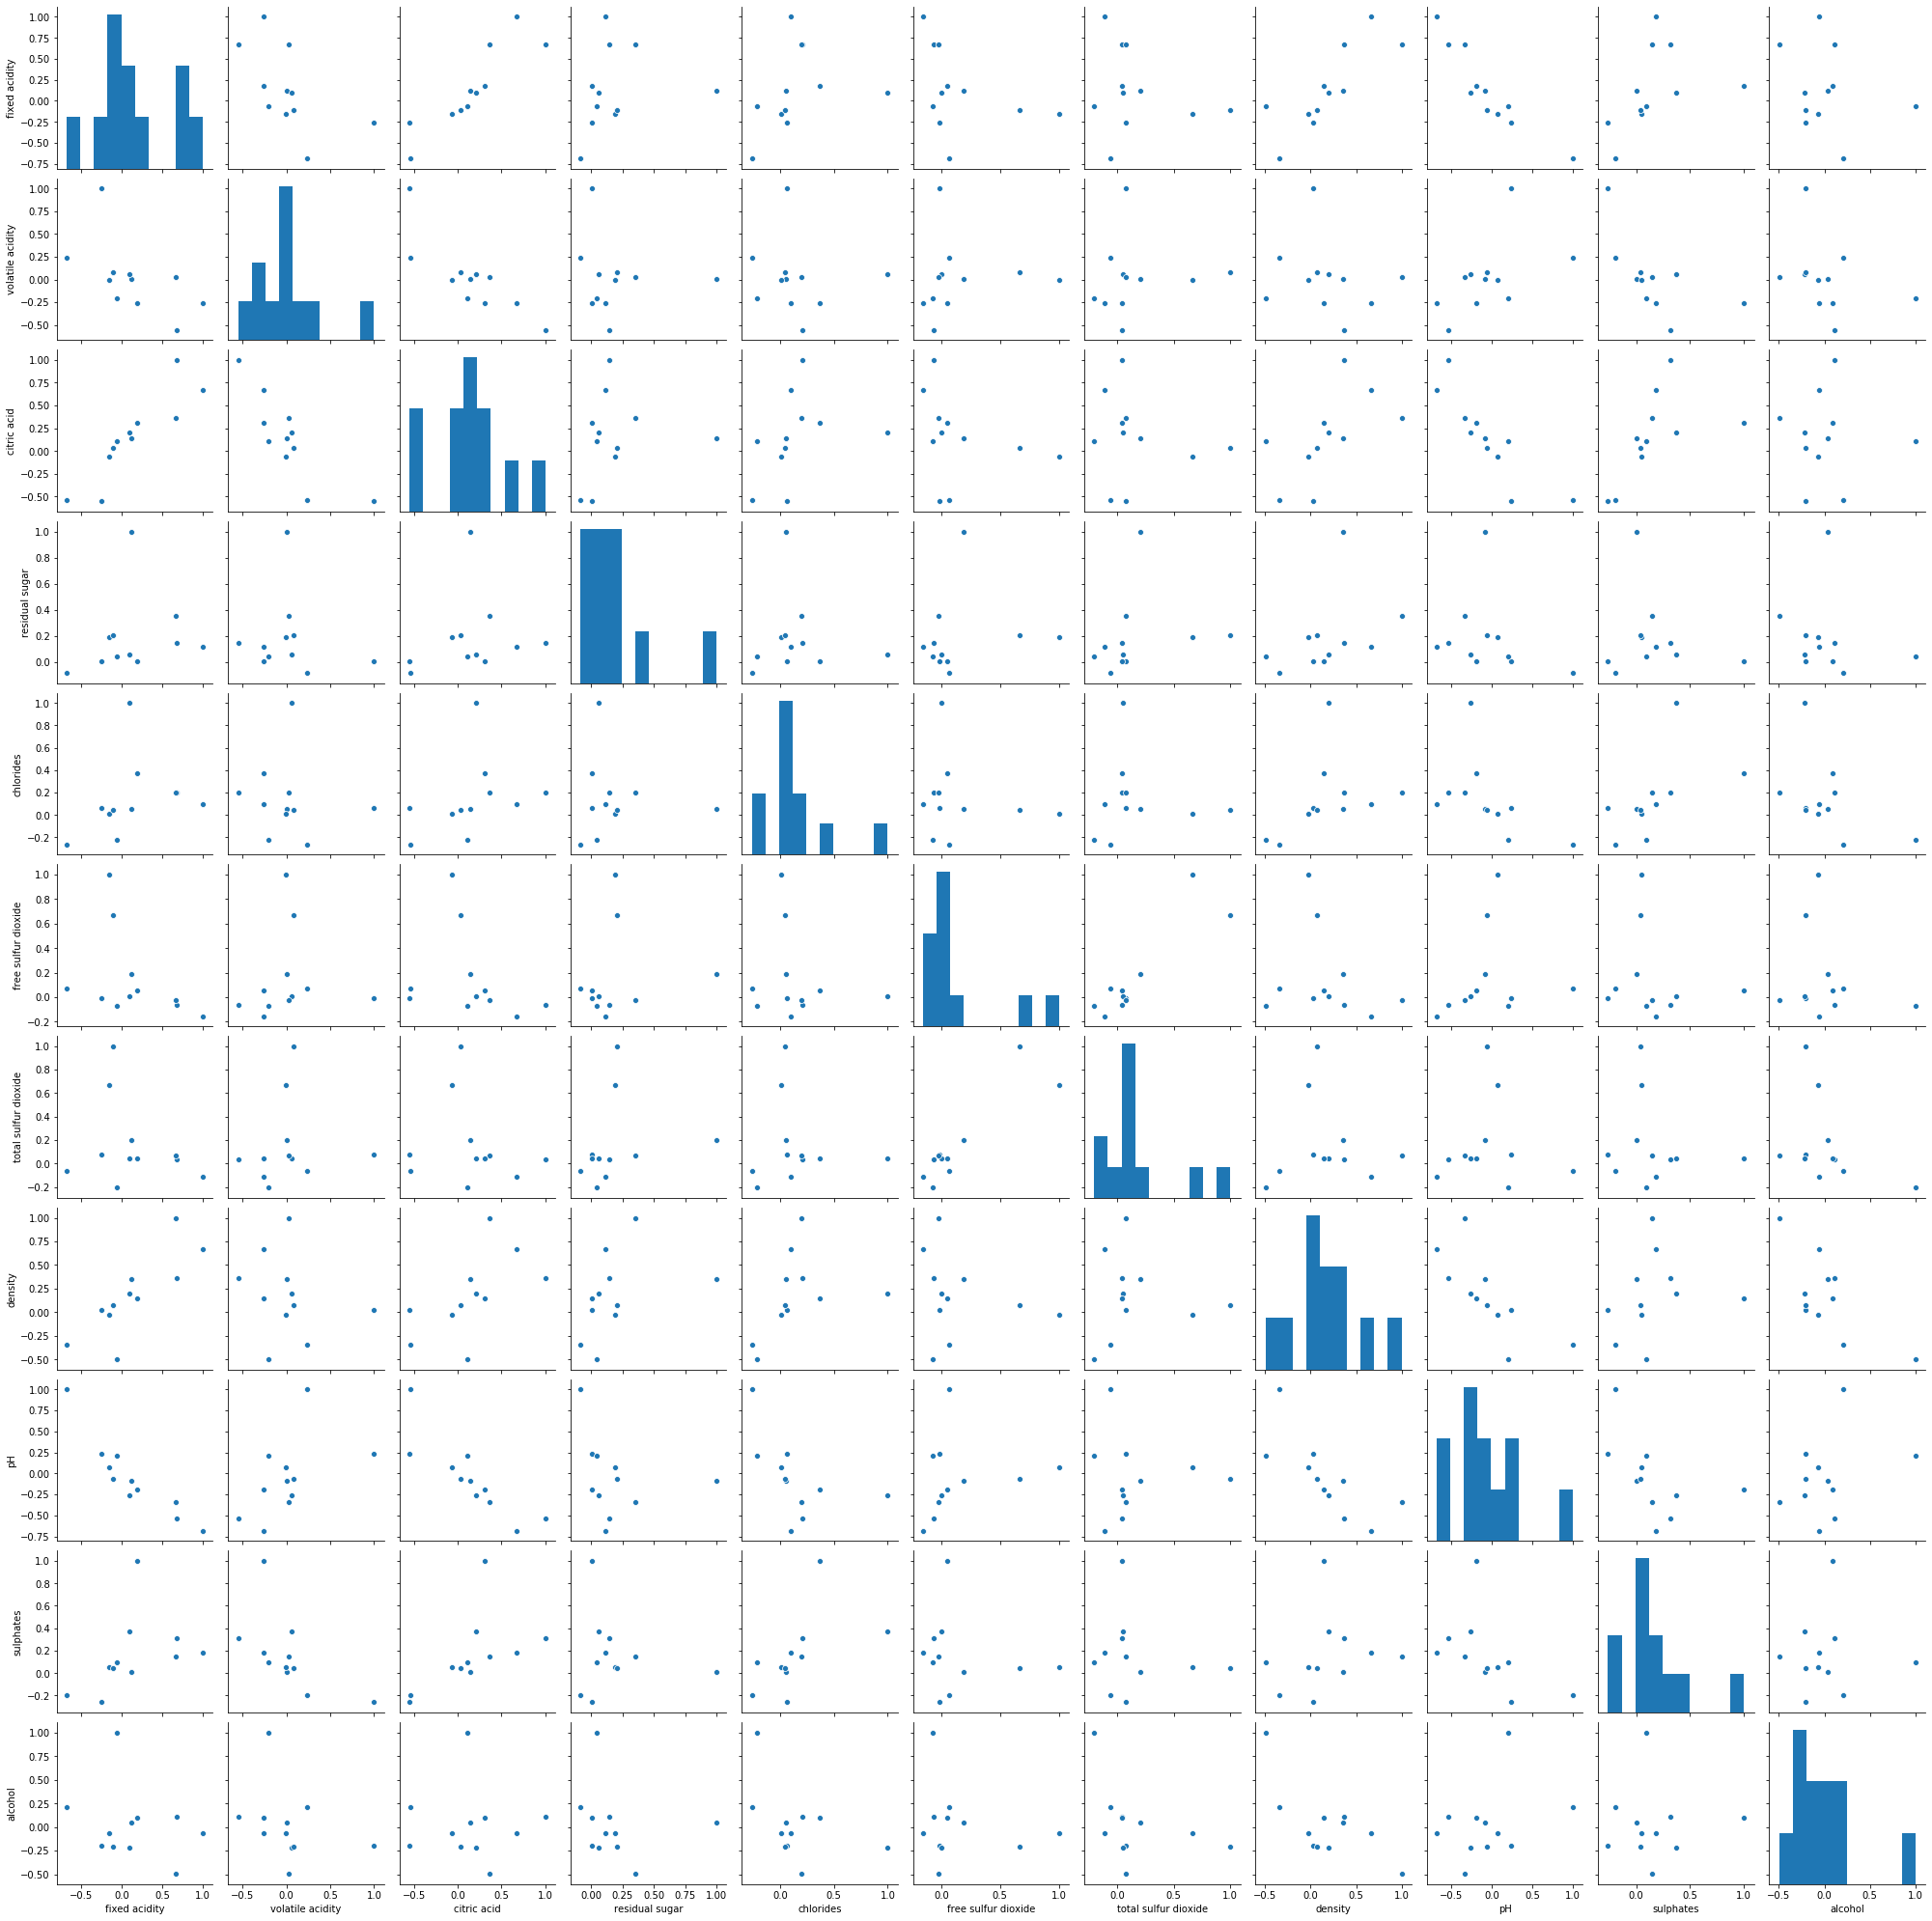

In [74]:
sns.pairplot(dscor)

# CHECKING SKEWNESS

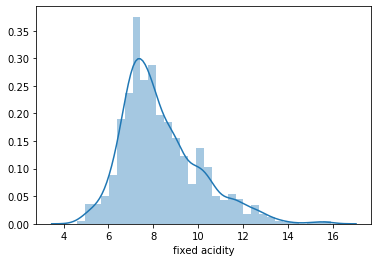

In [75]:
sns.distplot(ds_new['fixed acidity'])

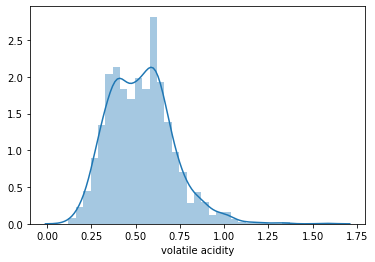

In [76]:
sns.distplot(ds_new['volatile acidity'])

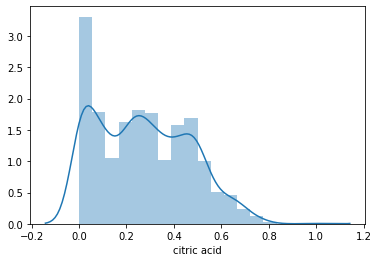

In [77]:
sns.distplot(ds_new['citric acid'])

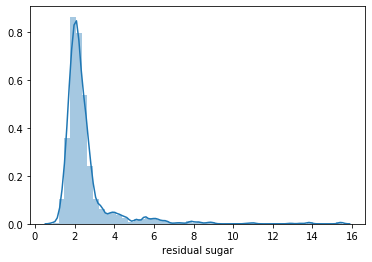

In [78]:
sns.distplot(ds_new['residual sugar'])

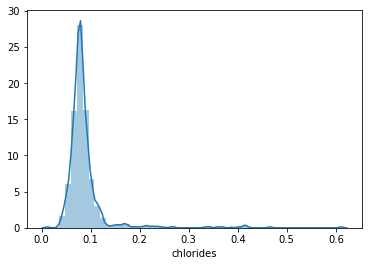

In [79]:
sns.distplot(ds_new['chlorides'])

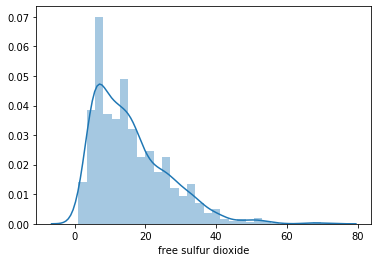

In [80]:
sns.distplot(ds_new['free sulfur dioxide'])

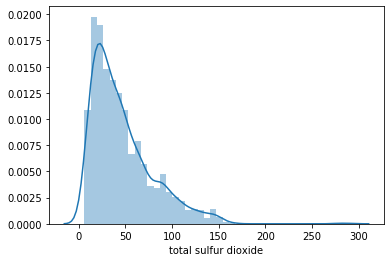

In [81]:
sns.distplot(ds_new['total sulfur dioxide'])

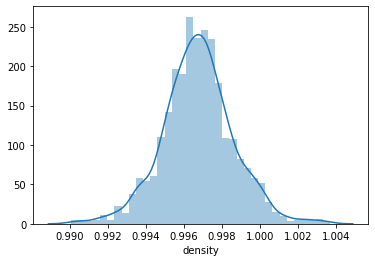

In [82]:
sns.distplot(ds_new['density'])

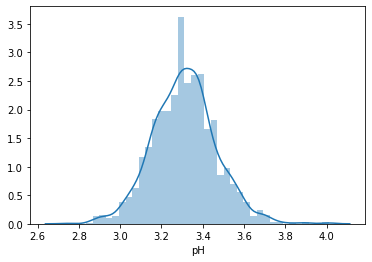

In [83]:
sns.distplot(ds_new['pH'])

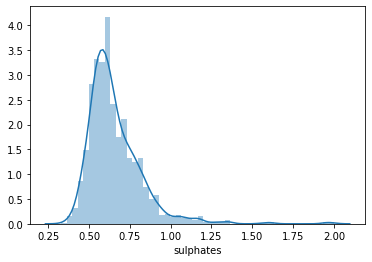

In [84]:
sns.distplot(ds_new['sulphates'])

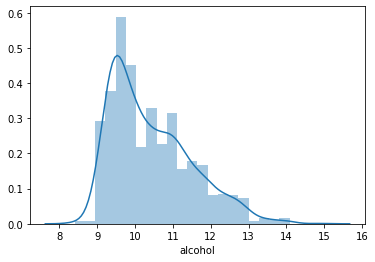

In [85]:
sns.distplot(ds_new['alcohol'])

OBSERVATION:
    
    Skewness is present in almost all columns.

# ENCODING THE TARGET COLUMN

In [88]:
#Label encoding the y column:
LE = LabelEncoder()
ds_new['quality'] = LE.fit_transform(ds_new['quality'])

# TREATING WITH OUTLIERS AND SKEWNESS:

In [89]:
#Removing Outliers:

from scipy.stats import zscore
z=np.abs(zscore(ds_new))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

In [90]:
threshold = 3
print(np.where(z>threshold))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [91]:
#creating new dataset without outliers and skewness
df_new = ds_new[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [92]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                -2.103030
dtype: float64

OBSERVATION:
    
    Skewness has drastically reduced after treating it with z-score method.

In [93]:
#after removing outliers:
df_new.shape

(1458, 12)

In [94]:
ds_new.shape

(1599, 12)

# CHEKING DATA LOSS AFTER REMOVING OUTLIERS

In [95]:
print((ds_new.shape[0]-df_new.shape[0])/ds_new.shape[0]*100)

8.818011257035648


OBSERVATIONS:
We are loosing almost 8.81% of datavalues by treating with the outliers.   

In [96]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [97]:
#creating new dataset from the earlier one in x, y part inorder to use it for further procedures.

In [98]:
x = df_new.iloc[:,0:11]
y = df_new.iloc[:,-1]

In [ ]:
#x

In [ ]:
#y

In [99]:
x.shape

(1458, 11)

In [100]:
y.shape

(1458,)

In [101]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# SCALING THE DATASET

In [102]:
#Scaling the dataset::
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
columnslist = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
x_scaled = pd.DataFrame(x_scaled, columns = columnslist)
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.554045,1.038708,-1.387413,-0.564985,-0.260755,-0.439085,-0.328538,0.629873,1.374768,-0.635382,-0.996573
1,-0.311190,2.101325,-1.387413,0.244255,0.776445,1.063952,0.793739,0.047678,-0.823752,0.289771,-0.604915
2,-0.311190,1.392914,-1.178214,-0.102562,0.493572,-0.009646,0.351630,0.164117,-0.398232,0.058483,-0.604915
3,1.753082,-1.440732,1.541370,-0.564985,-0.307900,0.205073,0.555680,0.746312,-1.107432,-0.481190,-0.604915
4,-0.554045,1.038708,-1.387413,-0.564985,-0.260755,-0.439085,-0.328538,0.629873,1.374768,-0.635382,-0.996573
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.282612,0.448365,-0.969015,-0.449379,0.399281,1.815470,0.011546,-1.058494,0.949248,-0.481190,0.080487
1454,-1.464753,0.153194,-0.864416,-0.218168,-0.920791,2.566989,0.249605,-0.930411,1.445688,0.906541,0.765889
1455,-1.221898,-0.082944,-0.707517,-0.102562,-0.260755,1.493391,-0.124487,-0.569449,0.736488,0.829444,0.570060
1456,-1.464753,0.714019,-0.759816,-0.449379,-0.307900,1.815470,0.011546,-0.726642,1.800288,0.521060,-0.213256


In [103]:
x_scaled.shape

(1458, 11)

In [104]:
y.shape

(1458,)

In [105]:
#Before Balancing the dataset

y.value_counts()

1    1257
0     201
Name: quality, dtype: int64

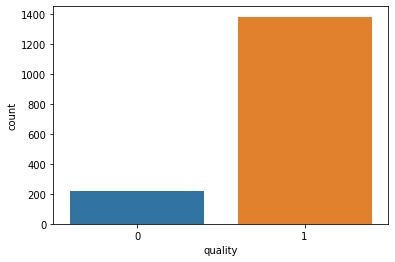

In [106]:
#plotting the imbalanced dataset:

import seaborn as sns
ax = sns.countplot(x='quality', data = ds_new)

#here 0 is good quality and 1 is bad quality

In [107]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x_scaled, y)

In [108]:
x_over.shape

(2514, 11)

In [109]:
y_over.shape

(2514,)

In [110]:
#After Balancing the dataset

y_over.value_counts()

1    1257
0    1257
Name: quality, dtype: int64

# CREATING TRAIN TEST DATASET

In [111]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=.20, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2011, 11)
(2011,)
(503, 11)
(503,)


# LOGISTICS REGRESSION MODEL:

In [113]:
# Logistic Regression:

lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
print('accuracy score - ', accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

accuracy score -  0.8290258449304175
[[212  50]
 [ 36 205]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       262
           1       0.80      0.85      0.83       241

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.83       503
weighted avg       0.83      0.83      0.83       503



# GAUSSIAN NB MODEL:

In [114]:
#As there are two target categories present in target column i.e. 'label' column.
# We can use GaussianNB algorithm for model making.

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predg = gnb.predict(x_test)
print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test, predg))

0.7972166998011928
[[206  56]
 [ 46 195]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       262
           1       0.78      0.81      0.79       241

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.80      0.80      0.80       503



# DECISION TREE MODEL:

In [115]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.9184890656063618
[[241  21]
 [ 20 221]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       262
           1       0.91      0.92      0.92       241

    accuracy                           0.92       503
   macro avg       0.92      0.92      0.92       503
weighted avg       0.92      0.92      0.92       503



# RANDOM FOREST CLASSIFIER MODEL:

In [116]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9642147117296223
[[255   7]
 [ 11 230]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       262
           1       0.97      0.95      0.96       241

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503



# ADA BOOST CLASSIFIER MODEL

In [117]:
ad = AdaBoostClassifier(n_estimators=100)
ad.fit(x_train, y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9025844930417495
[[238  24]
 [ 25 216]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       262
           1       0.90      0.90      0.90       241

    accuracy                           0.90       503
   macro avg       0.90      0.90      0.90       503
weighted avg       0.90      0.90      0.90       503



# SUPPORT VECTOR CLASSIFIER MODEL:

In [118]:
sv = SVC()
sv.fit(x_train, y_train)
pred= sv.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.882703777335984
[[225  37]
 [ 22 219]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       262
           1       0.86      0.91      0.88       241

    accuracy                           0.88       503
   macro avg       0.88      0.88      0.88       503
weighted avg       0.88      0.88      0.88       503



# Checking Over fitting with the help of cross validatin score:

In [119]:
print(cross_val_score(lg, x_over, y_over, cv=5).mean())

0.8050850276825106


In [120]:
print(cross_val_score(gnb, x_over, y_over, cv=5).mean())

0.7693021155932929


In [121]:
print(cross_val_score(dtc, x_over, y_over, cv=5).mean())

0.8623597063040085


In [122]:
print(cross_val_score(rf, x_over, y_over, cv=5).mean())

0.9256168170261301


In [123]:
print(cross_val_score(ad, x_over, y_over, cv=5).mean())

0.8595827425882948


In [124]:
print(cross_val_score(sv, x_over, y_over, cv=5).mean())

0.8528177548256279


# OBSERVATION:

OBSERVATIONS:

As difference between accuracy score and cross validation score of GaussianNB model is least, which is 1.63, we can say that GaussianNB is our best model

we have confirmed with cross checking the cross validation score of GaussianNB that overfitting is very less in the model.


# HYPER PARAMETER TUNING:

In [125]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 


In [126]:
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [127]:
gs_NB.best_params_

{'var_smoothing': 1.0}

# FINAL MODEL MAKING

In [128]:
gnb = GaussianNB(var_smoothing= 1.0)
gnb.fit(x_train, y_train)
predg = gnb.predict(x_test)
print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test, predg))

0.7992047713717694
[[211  51]
 [ 50 191]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       262
           1       0.79      0.79      0.79       241

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.80      0.80      0.80       503



ACCURACY OF OUR MODEL IS 79.92%

# ROC AUC CURVE

In [130]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [131]:
#fpr : false possitive rate
#tpr: true possitive rate

fpr, tpr, thresholds = roc_curve(y_test, predg)

In [132]:
#fpr : false possitive rate
fpr

array([0.        , 0.19465649, 1.        ])

In [133]:
#tpr: true possitive rate
tpr

array([0.        , 0.79253112, 1.        ])

In [134]:
thresholds

array([2, 1, 0])

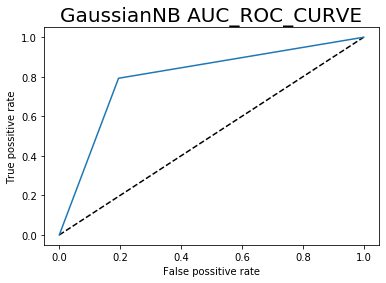

In [139]:
#Plotting AUC ROC Curve for GaussianNB model:

y_pred_prob = gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, predg)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label='GaussianNB Curve')
plt.xlabel('False possitive rate')
plt.ylabel('True possitive rate')
plt.title('GaussianNB AUC_ROC_CURVE', fontsize = 20)
plt.show()

# SAVING MDDEL:

In [136]:
import joblib
joblib.dump(gnb, 'Vaibhav_Red_Wine_Project_Model.pkl')

['Vaibhav_Red_Wine_Project_Model.pkl']

# RELOADING MODEL

In [137]:
#Reloading the model and predicting the dataset.
Red_wine_gnb_model = joblib.load('Vaibhav_Red_Wine_Project_Model.pkl')
Red_wine_gnb_model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 1])

# CONCLUSION:

OUR MODEL IS WORKING FINE WITH AN ACCURACY OF 79.92 %.


Regards:
    
Name: vaibhav tayade
contact detail: 8087970061
Email id: vaibhav_t29@rediffmail.com